# In this notebook:

## Creating non-linearly separable synthetic datasets

## Binary classification methods with 2 features for easy visualisation

- linear classification methods: logistic regression, SVM
- non-linear methods: polynomial SVM, RBF SVM

## Evaluating model performance:
- training/test set split,
- generalisation errors
- metrics: accuracy, F1 measures, average_precision_score, AUC (using classification reports)

In [ ]:
import urllib.request

# Imports commonFunctions from github. 
## NOTE: THIS IS A SECURITY RISK IF YOU HAD TO DO THIS IN REAL LIFE
!pip install httpimport
import httpimport

path = 'https://raw.githubusercontent.com/Trotts/csc2034-ds-demos/master/CODE/'
with httpimport.remote_repo(['commonFunctions'], path):
    from commonFunctions import *

In [ ]:
!pip install GraphViz

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


## what happens when the dataset is not _linearly separable_?

In [ ]:
# see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
# and https://scikit-learn.org/stable/datasets/index.html#sample-generators

X, CL = makeDataset(kind='circle', balanced = False, unbalance = 0.8)

381  CL values flipped
class labels ratio: 0.14


again let us first visualise this

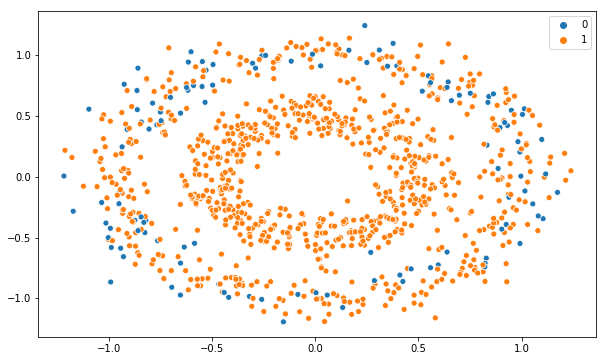

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=CL)

can we still learn a meaningful linear model?

In [ ]:
XTrain, XTest, CLTrain, CLTest = train_test_split(X, CL, test_size = 0.33, random_state = 10)

In [ ]:
XTrainScaled, XTestScaled  = scale(XTrain, XTest)

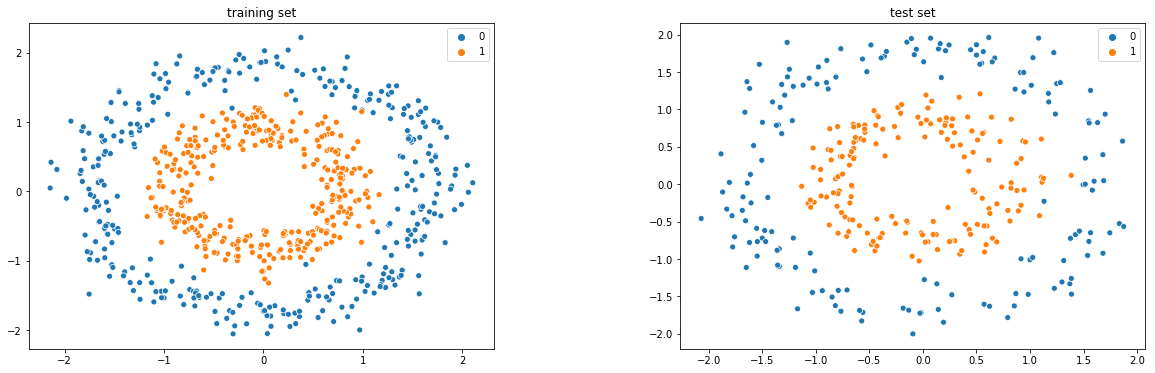

In [ ]:
plotTrainTest(XTrainScaled, CLTrain, XTestScaled, CLTest)

## trying logit

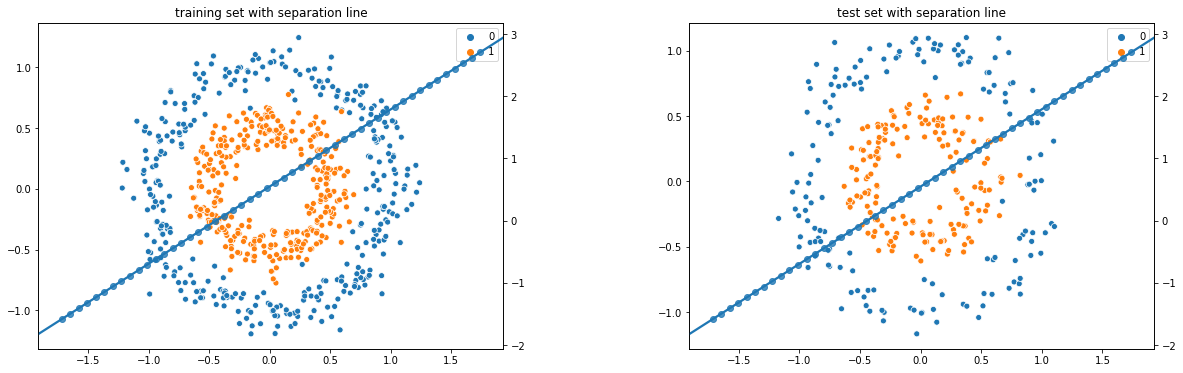

logit classification accuracy on training set: 0.50
logit classification accuracy on test set: 0.45
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       160
           1       0.46      0.42      0.44       170

    accuracy                           0.45       330
   macro avg       0.45      0.45      0.45       330
weighted avg       0.45      0.45      0.45       330

average precision score: 0.49
confusion matrix: 
 [[75 85]
 [98 72]]
tn: 75.00, fp: 85.000, fn: 98.00, tp: 72.00
using decision_function


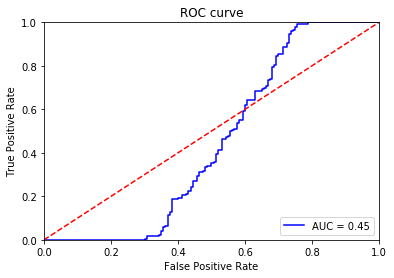

In [ ]:
clf, CL_pred_Train, CL_pred_Test = logit(XTrainScaled, CLTrain, XTestScaled, CLTest)

plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)

## Decision trees

logit classification accuracy on training set: 0.50
logit classification accuracy on test set: 0.45
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       160
           1       0.46      0.42      0.44       170

    accuracy                           0.45       330
   macro avg       0.45      0.45      0.45       330
weighted avg       0.45      0.45      0.45       330

average precision score: 0.49
confusion matrix: 
 [[75 85]
 [98 72]]
tn: 75.00, fp: 85.000, fn: 98.00, tp: 72.00
using predict_proba


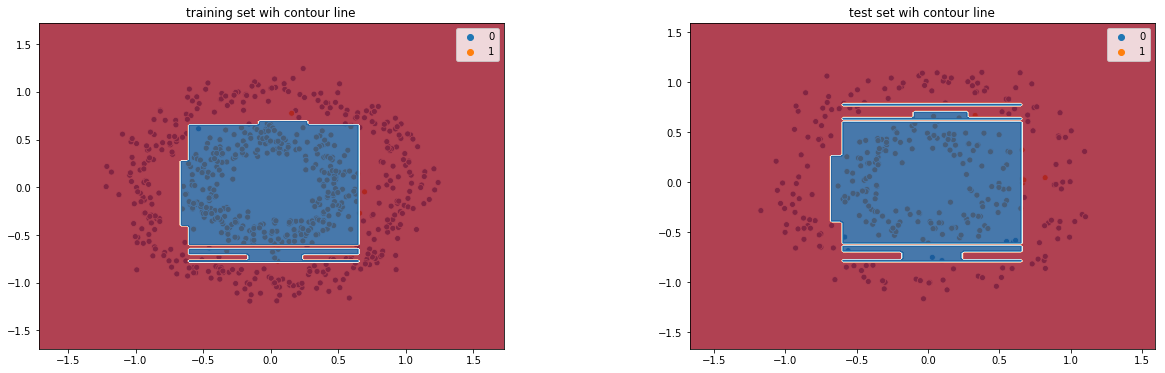

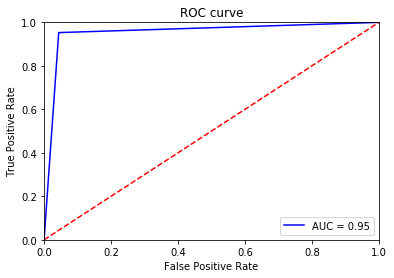

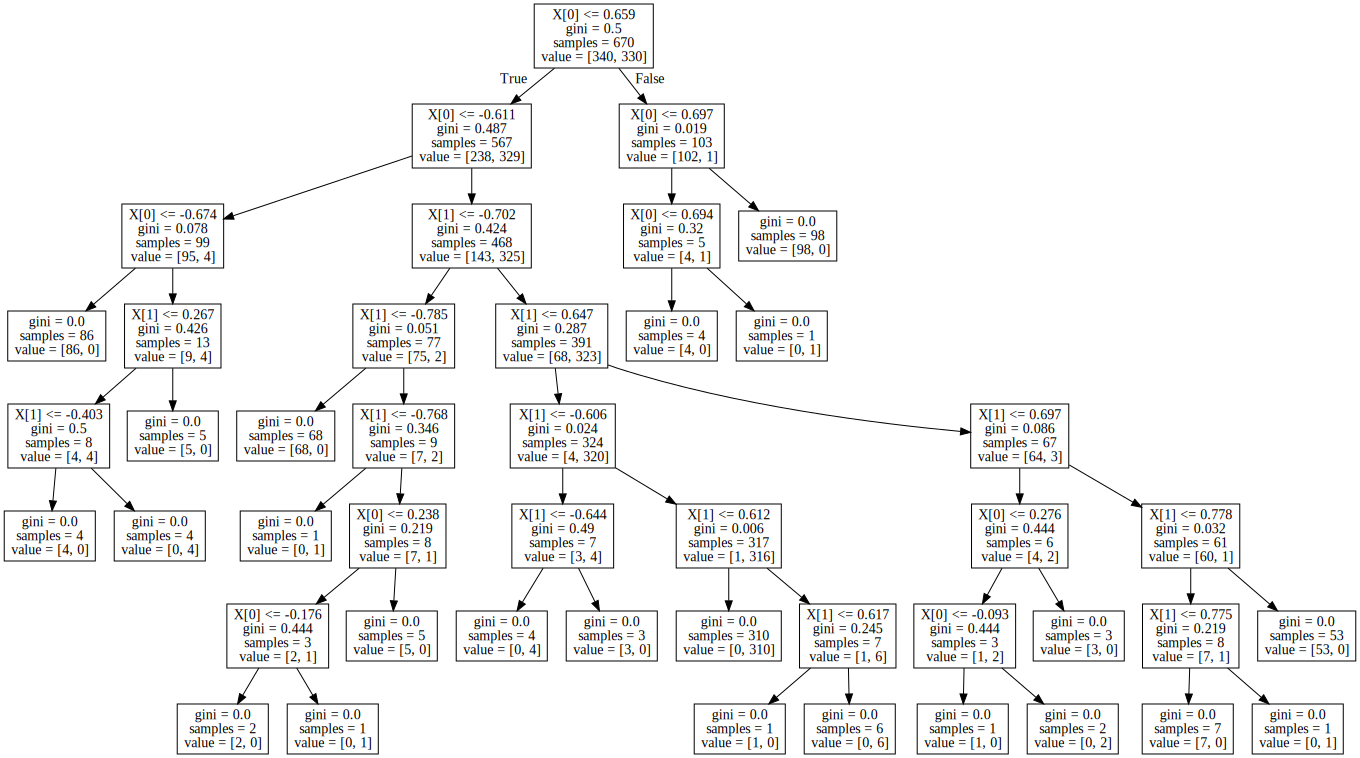

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(XTrain, CLTrain)

plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)


dot = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot) 
graph


## let's try SVM with a polynomial kernel

logit classification accuracy on training set: 0.89
logit classification accuracy on test set: 0.85
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.85      1.00      0.92       282

    accuracy                           0.85       330
   macro avg       0.43      0.50      0.46       330
weighted avg       0.73      0.85      0.79       330

average precision score: 0.85
confusion matrix: 
 [[  0  48]
 [  0 282]]
tn: 0.00, fp: 48.000, fn: 0.00, tp: 282.00


/Users/npm65/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


using decision_function


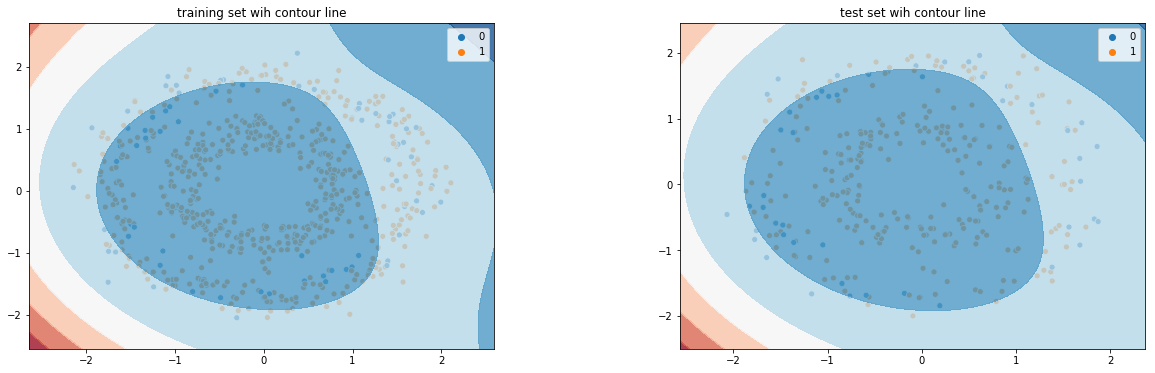

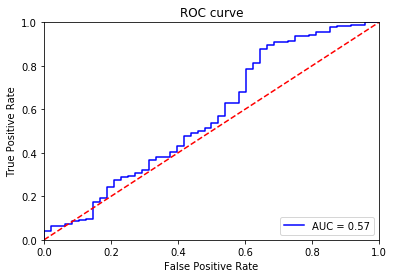

In [ ]:
clf, CL_pred_Train, CL_pred_Test  = SVM(XTrainScaled, CLTrain, XTestScaled, CLTest, kernel='poly')

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotContourFitTrainTest(clf, XTrainScaled, CLTrain, XTestScaled, CLTest)

plotROC(clf, XTest, CLTest)

## and the RBF kernel

logit classification accuracy on training set: 0.99
logit classification accuracy on test set: 0.99
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.99      0.99      0.99       170

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330

average precision score: 0.99
confusion matrix: 
 [[158   2]
 [  1 169]]
tn: 158.00, fp: 2.000, fn: 1.00, tp: 169.00
using decision_function


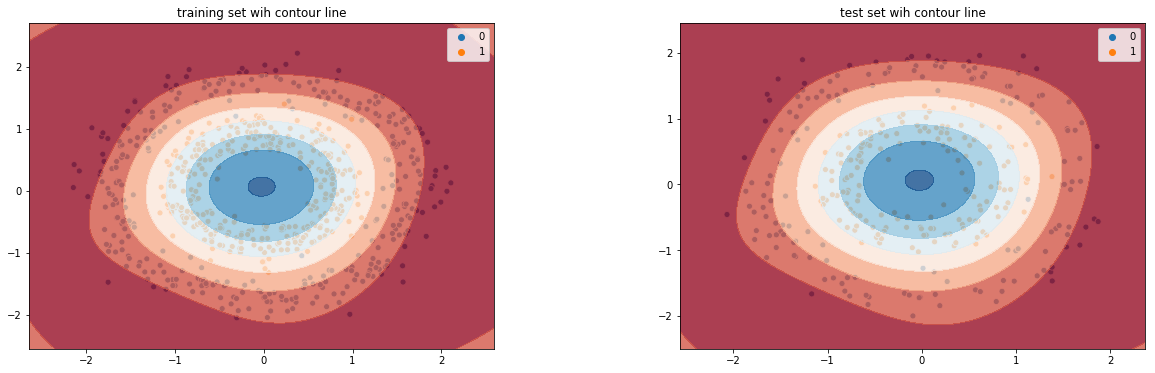

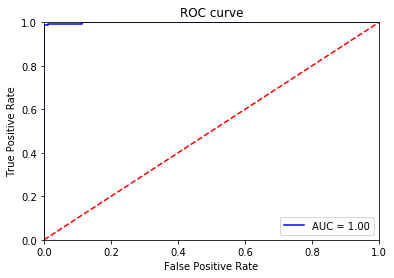

In [ ]:
clf, CL_pred_Train, CL_pred_Test  = SVM(XTrainScaled, CLTrain, XTestScaled, CLTest, kernel='rbf')

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotContourFitTrainTest(clf, XTrainScaled, CLTrain, XTestScaled, CLTest)

plotROC(clf, XTest, CLTest)